In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9

In [2]:
def generate_observed_params(nsamples):

    logphi1 = np.random.normal([-2.44, -3.08, -4.14], [0.04, 0.05, 0.2], (nsamples, 3))
    logphi2 = np.random.normal([-2.89, -3.29, -3.51], [0.07, 0.06, 0.06], (nsamples, 3))
    logm_star = np.random.normal([10.79, 10.88, 10.84], [0.04, 0.04, 0.08], (nsamples, 3))
    alpha1 = np.random.uniform(-0.5 , 1, nsamples)
    alpha2 = np.random.uniform(-2 , -0.5, nsamples)

    return [logphi1, logphi2, logm_star, alpha1, alpha2]

In [3]:
def get_quadratic_coeffs(samples):

    y1 = samples[:, 2]
    y2 = samples[:, 1]
    y3 = samples[:, 0]

    z1 = 3.0
    z2 = 1.6
    z3 = 0.2

    a = ((y3-y1) + ((y2-y1) / (z2-z1)) * (z1-z3)) / ((z3**2-z1**2 + ((z2**2-z1**2) / (z2-z1)) * (z1-z3)))
    b = ((y2-y1) - a * (z2**2-z1**2)) / (z2-z1)
    c = y1-a*z1**2-b*z1

    return np.transpose(np.vstack((a, b, c)))


In [4]:
def mass_function_parameters(z, nsamples):

    observed_mass_function_parameters = generate_observed_params(nsamples)
    redshift_dependent_parameters = observed_mass_function_parameters[:3]
    alpha1 = observed_mass_function_parameters[3]
    alpha2 = observed_mass_function_parameters[4]

    coeffs = []
    for parameter in redshift_dependent_parameters:
        coeffs.append(get_quadratic_coeffs(parameter))

    logphi1_coeffs = coeffs[0]
    logphi2_coeffs = coeffs[1]
    logm_star_coeffs = coeffs[2]

    logphi1_z = logphi1_coeffs[:, 2] + logphi1_coeffs[:, 1]*z + logphi1_coeffs[:, 0]*z*z
    logphi2_z = logphi2_coeffs[:, 2] + logphi2_coeffs[:, 1]*z + logphi2_coeffs[:, 0]*z*z
    logm_starparams_z = logm_star_coeffs[:, 2] + logm_star_coeffs[:, 1]*z + logm_star_coeffs[:, 0]*z*z 

    return np.transpose(np.vstack((logphi1_z, logphi2_z, logm_starparams_z, alpha1, alpha2)))


In [5]:
def mass_function_parameter_curves(z_grid, nsamples):

    observed_mass_function_parameters = generate_observed_params(nsamples)
    redshift_dependent_parameters = observed_mass_function_parameters[:3]

    curves = []
    for param in redshift_dependent_parameters:
        coeffs = get_quadratic_coeffs(param)
        a = np.reshape(coeffs[:, 0], (nsamples, 1))
        b = np.reshape(coeffs[:, 1], (nsamples, 1))
        c = np.reshape(coeffs[:, 2], (nsamples, 1))
        z_grid_tile = np.tile(z_grid, (nsamples, 1))

        logparam = c*np.ones_like(z_grid_tile) + b*z_grid_tile + a*z_grid_tile*z_grid_tile
        curves.append(logparam)

    return curves

In [6]:
def plot_mass_function_parameter_curves(z_grid, curves):

    fig, axes = plt.subplots(1, 3)
    fig.set_figheight(10)
    fig.set_figwidth(30)
    ylabels = ['log$_{10}\phi_{1}$', 'log$_{10}\phi_{2}$', 'log$_{10}\mathrm{M}_{*}$']
    ncurves = curves[0].shape[0]
    plot_no = 0
    for param in curves:
        i = 0
        while(i < ncurves):
            axes[plot_no].plot(z_grid, param[i, :], c='purple', alpha=0.1)
            axes[plot_no].set_xlabel('$z$', fontsize=20)
            axes[plot_no].set_ylabel(ylabels[plot_no], fontsize=20)
            i+=1
        plot_no+=1

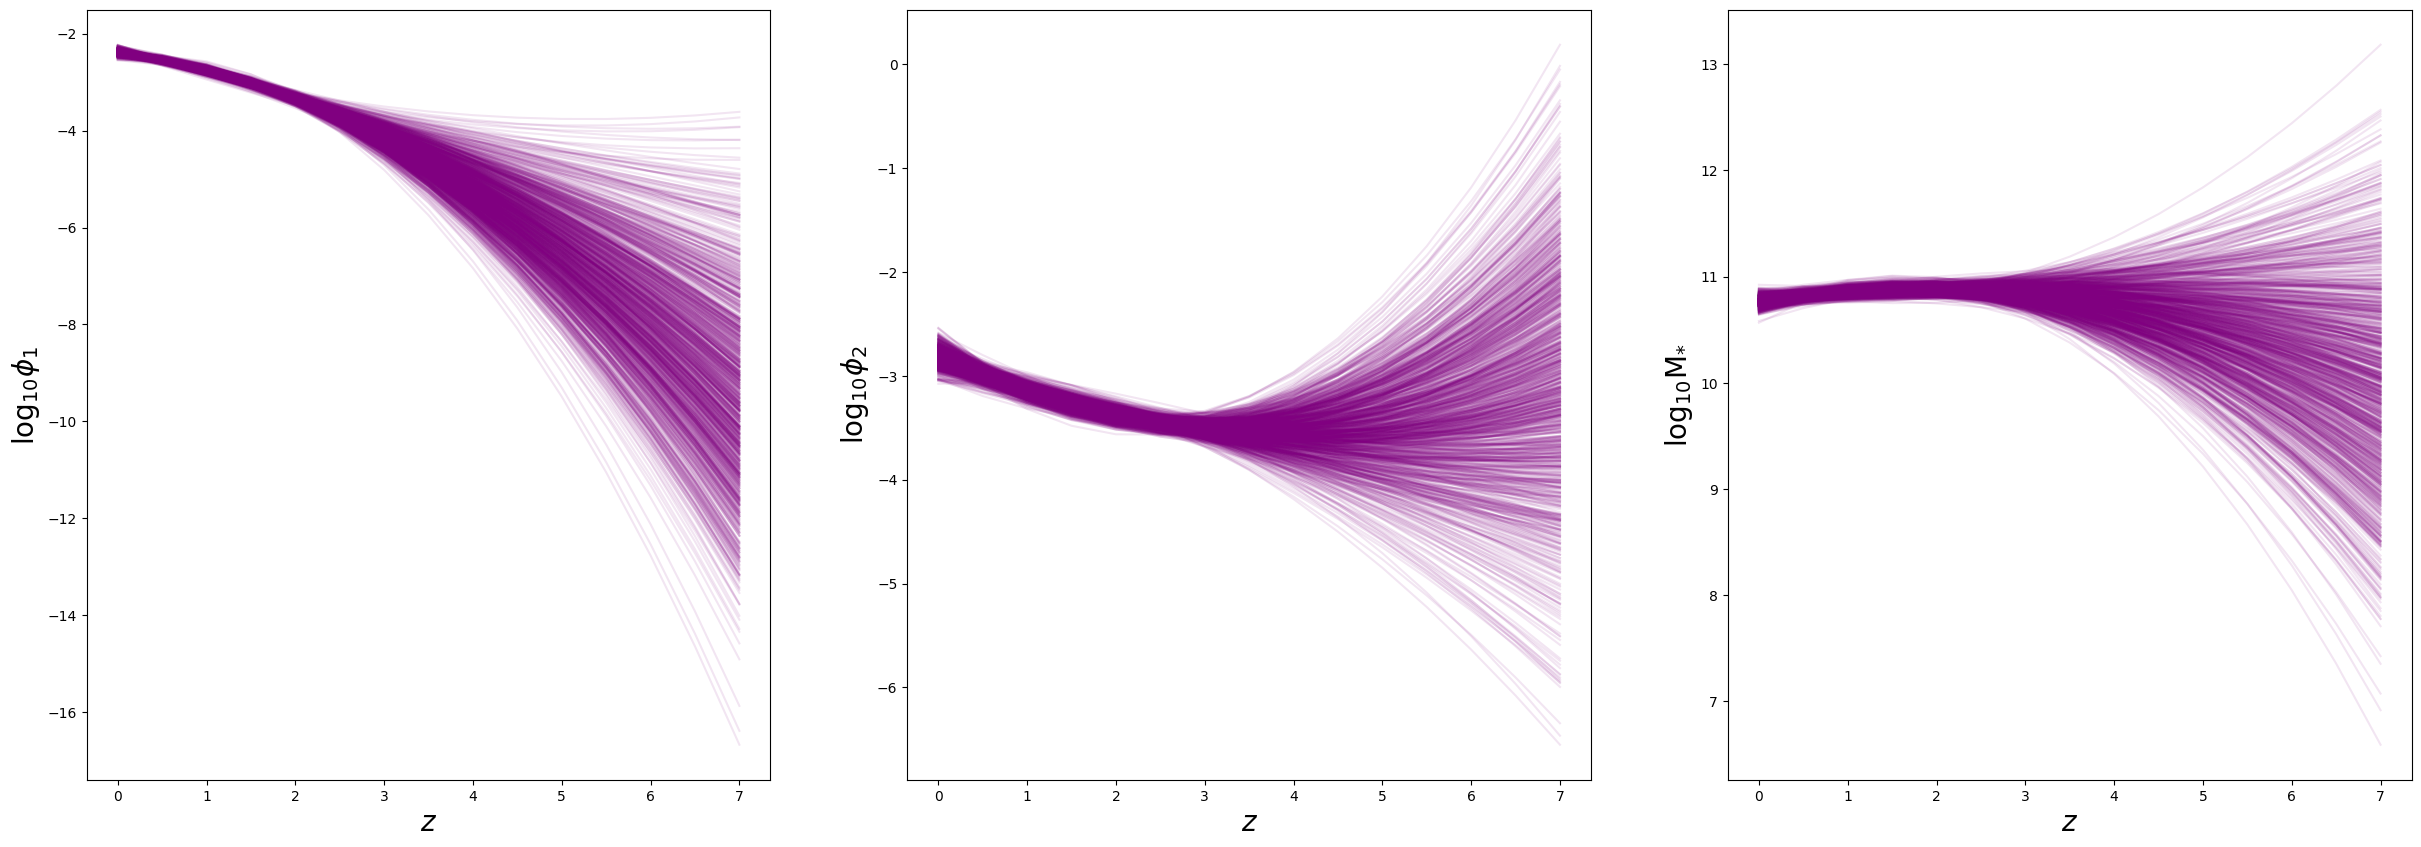

In [7]:
z_grid = np.linspace(0, 7, 15)
plot_mass_function_parameter_curves(z_grid, mass_function_parameter_curves(z_grid, 1000))

In [8]:
mass_function_parameters(0.2, 1000)

array([[-2.46602911e+00, -2.72656168e+00,  1.08355756e+01,
        -1.23547959e-01, -1.34084450e+00],
       [-2.47998408e+00, -2.84585203e+00,  1.07838231e+01,
         6.21423895e-01, -1.95432394e+00],
       [-2.48859580e+00, -2.89569834e+00,  1.07966021e+01,
         9.36116917e-01, -6.07331680e-01],
       ...,
       [-2.47278976e+00, -2.81069520e+00,  1.07923059e+01,
         5.84069043e-01, -1.14801163e+00],
       [-2.47191497e+00, -2.92294483e+00,  1.08042929e+01,
         7.26121352e-04, -1.39235161e+00],
       [-2.46112476e+00, -2.81500418e+00,  1.07540015e+01,
         5.99538851e-01, -1.22264821e+00]])